In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import networkx as nx
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,silhouette_score
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [188]:
df=pd.read_csv("./data/tracks.csv")
df.head(10)

,Unnamed: 0,uris,names,artist_names,artist_uris,artist_pop,artist_genres,albums,track_pop,danceability,...,liveness,valences,tempos,types,ids,track_hrefs,analysis_urls,durations_ms,time_signatures,playlist_name
0,0,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,2LIk90788K0zvyj2JJVwkJ,81,"['deep underground hip hop', 'kentucky hip hop...",Lovin On Me,88,0.943,...,0.0937,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,Hot Hits Australia
1,1,0cVyQfDyRnMJ0V3rjjdlU3,Lil Boo Thang,Paul Russell,4zoRNhOhsGX3w8yBAnFSQ8,64,['indie r&b'],Lil Boo Thang,86,0.850,...,0.3200,0.915,114.481,audio_features,0cVyQfDyRnMJ0V3rjjdlU3,https://api.spotify.com/v1/tracks/0cVyQfDyRnMJ...,https://api.spotify.com/v1/audio-analysis/0cVy...,114234,4,Hot Hits Australia
2,2,31MNHKE86sEXzIglbGQ6mu,Got Me Started,Troye Sivan,3WGpXCj9YhhfX11TToZcXP,78,"['australian pop', 'pop', 'viral pop']",Something To Give Each Other,83,0.777,...,0.3180,0.582,127.002,audio_features,31MNHKE86sEXzIglbGQ6mu,https://api.spotify.com/v1/tracks/31MNHKE86sEX...,https://api.spotify.com/v1/audio-analysis/31MN...,198448,4,Hot Hits Australia
3,3,4OMJGnvZfDvsePyCwRGO7X,Houdini,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,85,"['dance pop', 'pop', 'uk pop']",Houdini,90,0.744,...,0.0947,0.866,116.985,audio_features,4OMJGnvZfDvsePyCwRGO7X,https://api.spotify.com/v1/tracks/4OMJGnvZfDvs...,https://api.spotify.com/v1/audio-analysis/4OMJ...,185918,4,Hot Hits Australia
4,4,5aIVCx5tnk0ntmdiinnYvw,Water,Tyla,3SozjO3Lat463tQICI9LcE,73,[],Water,96,0.673,...,0.1370,0.519,117.187,audio_features,5aIVCx5tnk0ntmdiinnYvw,https://api.spotify.com/v1/tracks/5aIVCx5tnk0n...,https://api.spotify.com/v1/audio-analysis/5aIV...,200256,4,Hot Hits Australia
5,5,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,45dkTj5sMRSjrmBSBeiHym,81,"['alt z', 'pop']",greedy,100,0.750,...,0.1140,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,Hot Hits Australia
6,6,1aNUSKBe6UMyMk3pEu9ws7,Atmosphere,FISHER,1VJ0briNOlXRtJUAzoUJdt,68,"['australian house', 'house']",Atmosphere,78,0.762,...,0.2030,0.755,125.979,audio_features,1aNUSKBe6UMyMk3pEu9ws7,https://api.spotify.com/v1/tracks/1aNUSKBe6UMy...,https://api.spotify.com/v1/audio-analysis/1aNU...,182857,4,Hot Hits Australia
7,7,7DlZH8EiVDgQXNoj3dnyZC,Paint The Town Red,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5,86,"['dance pop', 'pop']",Scarlet,82,0.864,...,0.1120,0.726,99.974,audio_features,7DlZH8EiVDgQXNoj3dnyZC,https://api.spotify.com/v1/tracks/7DlZH8EiVDgQ...,https://api.spotify.com/v1/audio-analysis/7DlZ...,230480,4,Hot Hits Australia
8,8,1yeB8MUNeLo9Ek1UEpsyz6,Rich Baby Daddy (feat. Sexyy Red & SZA),Drake,3TVXtAsR1Inumwj472S9r4,95,"['canadian hip hop', 'canadian pop', 'hip hop'...",For All The Dogs,88,0.645,...,0.3840,0.142,146.010,audio_features,1yeB8MUNeLo9Ek1UEpsyz6,https://api.spotify.com/v1/tracks/1yeB8MUNeLo9...,https://api.spotify.com/v1/audio-analysis/1yeB...,319192,4,Hot Hits Australia
9,9,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,40ZNYROS4zLfyyBSs2PGe2,86,"['classic oklahoma country', 'modern country p...",Zach Bryan,93,0.429,...,0.1020,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,Hot Hits Australia


In [189]:
df.describe()

,Unnamed: 0,artist_pop,track_pop,danceability,energy,keys,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valences,tempos,durations_ms,time_signatures
count,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000
mean,3996.500000,59.152114,59.906055,0.599143,0.576410,5.062672,-9.987147,0.663623,0.090147,0.316251,0.143637,0.169939,0.456958,117.630441,211104.303728,3.909682
std,2307.813359,18.204913,19.833753,0.194913,0.259607,3.594302,8.642834,0.472499,0.092690,0.332987,0.310345,0.133552,0.248399,28.344774,69833.844911,0.442742
min,0.000000,0.000000,0.000000,0.056500,0.000062,0.000000,-50.060000,0.000000,0.022700,0.000002,0.000000,0.015400,0.000000,31.237000,50765.000000,1.000000
25%,1998.250000,46.000000,50.000000,0.493000,0.445000,2.000000,-10.192750,0.000000,0.037500,0.037125,0.000000,0.094725,0.253000,96.930500,166815.500000,4.000000
50%,3996.500000,60.000000,63.000000,0.629000,0.628000,5.000000,-7.157500,1.000000,0.050000,0.175000,0.000016,0.117000,0.447000,117.972500,198774.500000,4.000000
75%,5994.750000,73.000000,75.000000,0.741000,0.770000,8.000000,-5.348000,1.000000,0.093975,0.547000,0.013075,0.197000,0.644000,135.022750,237852.750000,4.000000
max,7993.000000,100.000000,100.000000,0.989000,0.997000,11.000000,1.508000,1.000000,0.880000,0.996000,0.991000,0.982000,0.989000,230.186000,812625.000000,5.000000


In [190]:
df.artist_genres.unique()

array(["['deep underground hip hop', 'kentucky hip hop', 'pop rap', 'rap']",
       "['indie r&b']", "['australian pop', 'pop', 'viral pop']", ...,
       "['deep tropical house', 'indie poptimism', 'tropical house']",
       "['deep tropical house', 'pop edm']",
       "['deep house', 'future garage', 'house']"], dtype=object)

In [191]:
df.isna().sum()

Unnamed: 0          0
uris                0
names               0
artist_names        0
artist_uris         0
artist_pop          0
artist_genres       0
albums              0
track_pop           0
danceability        0
energy              0
keys                0
loudness            0
modes               0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valences            0
tempos              0
types               0
ids                 0
track_hrefs         0
analysis_urls       0
durations_ms        0
time_signatures     0
playlist_name       0
dtype: int64

In [192]:
num_cols=df.select_dtypes(include=['float']).columns
num_cols

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos'],
      dtype='object')

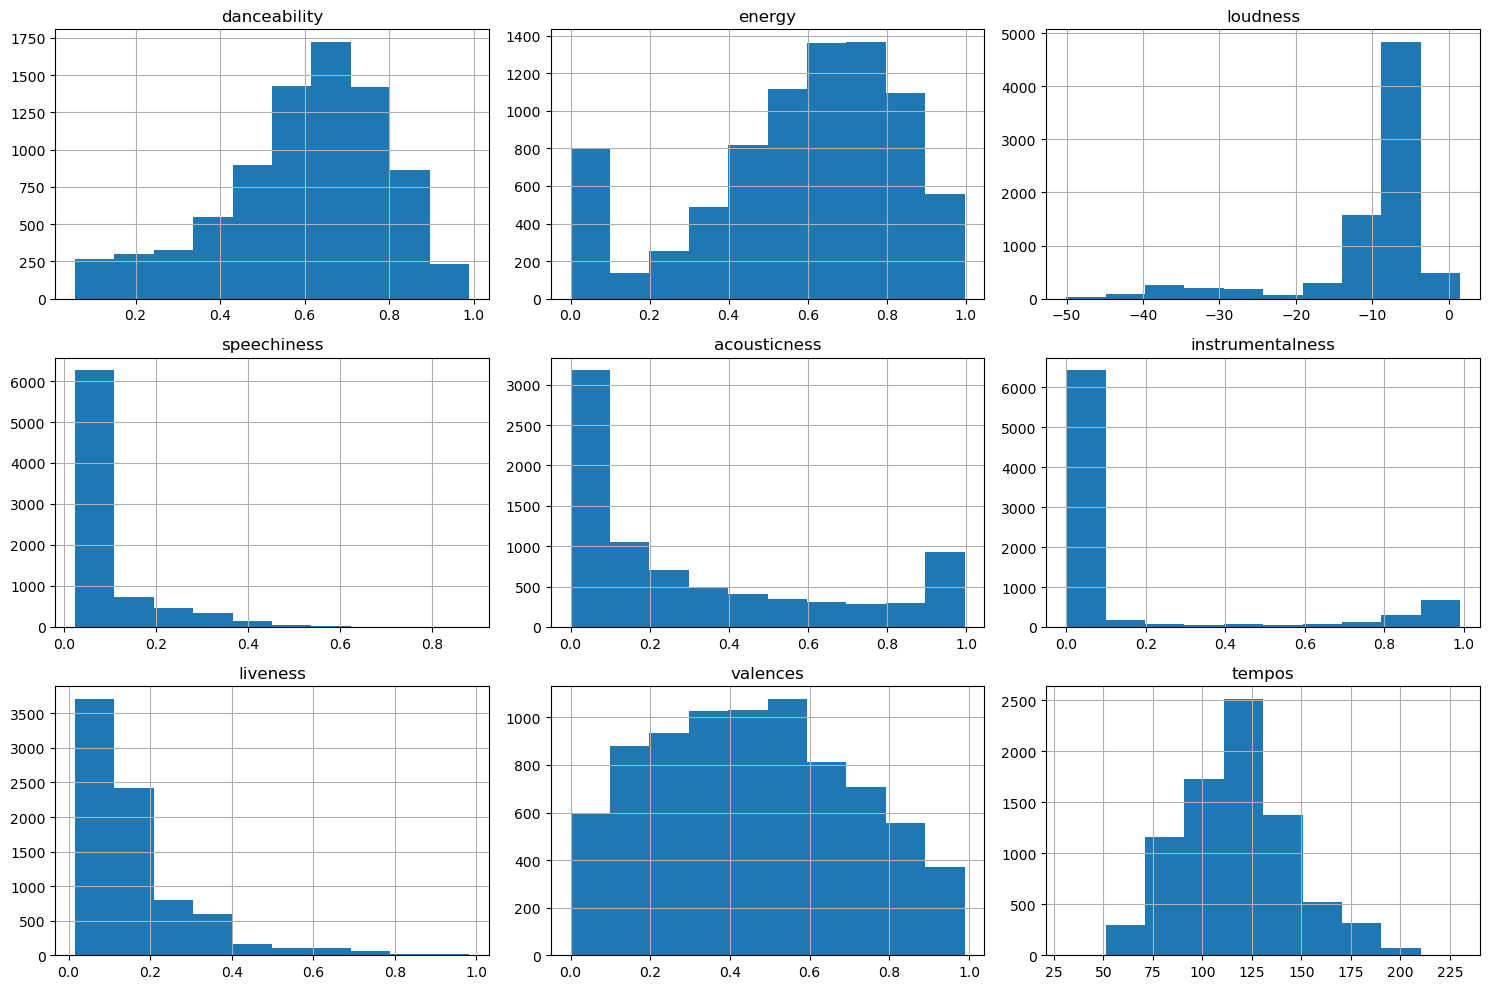

In [193]:
num_features=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valences', 'tempos']
df[num_features].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

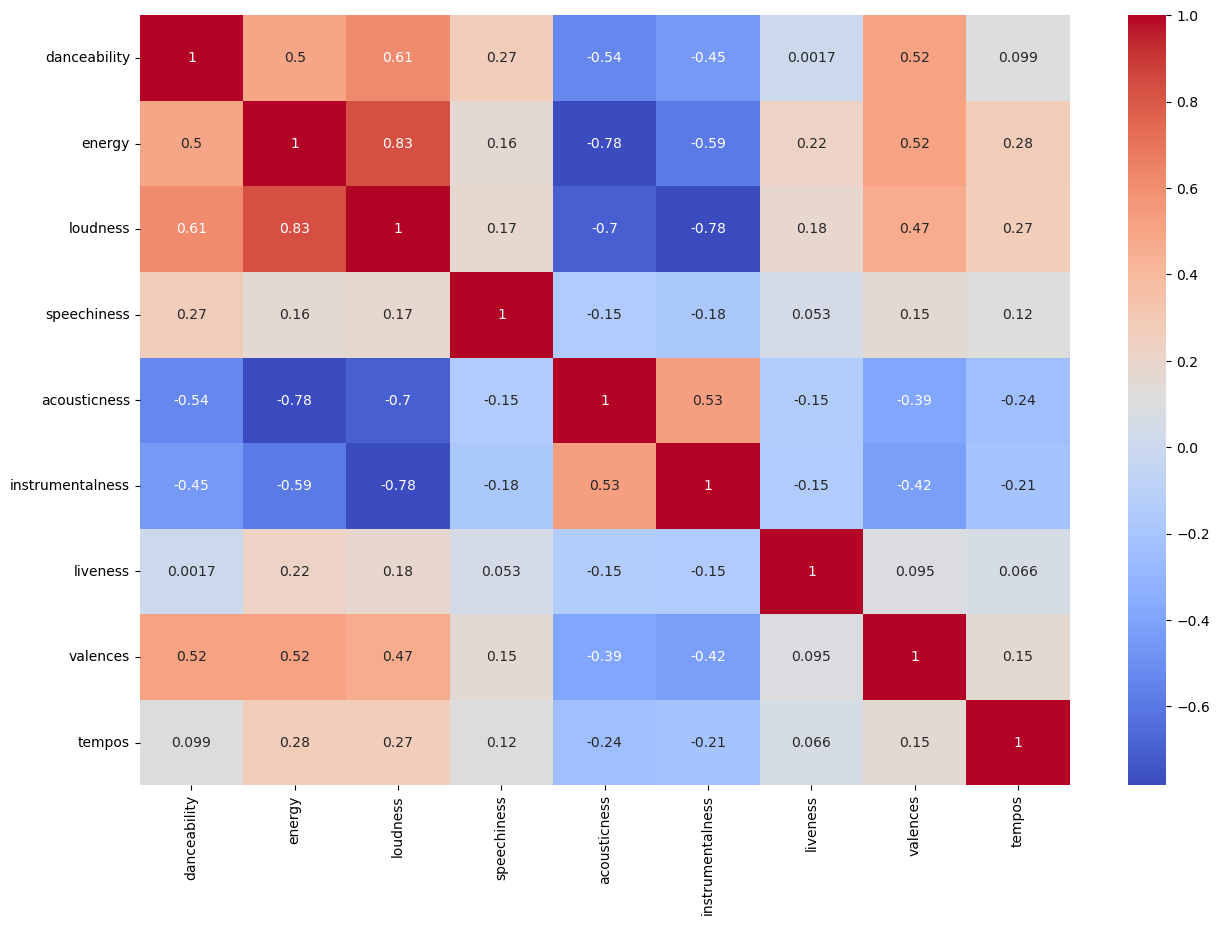

In [194]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_features].corr(),annot=True,cmap='coolwarm')
plt.show()

In [195]:
# test the statistics between two genres
def test_genre(df,feature,genre1,genre2):
    g1=df[df['artist_genres'].str.contains(genre1)][feature]
    g2=df[df['artist_genres'].str.contains(genre2)][feature]
    t_stat,p_val=stats.ttest_ind(g1,g2)
    print(f"t_statistics: {t_stat:.3f}, P-Val: {p_val:.3f}")

test_genre(df,'danceability','rock','pop')

t_statistics: -14.632, P-Val: 0.000


In [196]:
# get the unique genres and their counts
get_genre_unique=df.artist_genres.unique()
genres=df.artist_genres.str.get_dummies(sep=',')
genre_counts=genres.sum().sort_values(ascending=False)
genre_counts

[]                       1317
['pop']                   307
['dance pop'              303
 'pop']                   299
 'pop'                    297
                         ... 
 'proto-metal']             1
['disco house'              1
 'proto-hyperpop']          1
 'progressive metal']       1
 'classical drill'          1
Length: 1774, dtype: int64

In [197]:
## Develop collaborative filter

#find all unique genres
def parse_genres(genre_string):
    return re.findall(r"'(.*?)'",genre_string)

df['artist_genres']=df['artist_genres'].apply(parse_genres)
all_genres=set([genre for genres in df['artist_genres'] for genre in genres])

In [198]:
# define a user-genre matrix, we can simulate it
# by default, assume there are 10 users, each user tried each genre by randomly pick a track that has this genre and has a score via track_pop. 

def create_user_matrix(df,all_genres,n_users=10):
    user_genre_data=[]
    for user_id in range(n_users):
        for genre in all_genres:
            tracks_with_genre=df[df['artist_genres'].apply(lambda x: genre in x)]
            if not tracks_with_genre.empty:
                interaction=np.random.choice(tracks_with_genre['track_pop'])
                user_genre_data.append([user_id,genre,interaction])
    user_genre_df=pd.DataFrame(user_genre_data,columns=['user_id','genre','interaction'])
    return user_genre_df.pivot(index='user_id',columns='genre',values='interaction').fillna(0)

In [199]:
user_genre_matrix=create_user_matrix(df,all_genres)
user_genre_matrix

genre,528hz,a cappella,acid rock,acoustic pop,adult standards,aesthetic rap,african gospel,african rock,afrikaans,afrikaans hip hop,...,worship,xhosa,xhosa hip hop,yacht rock,ye ye,yodeling,zambian hip hop,zambian pop,zcc,zolo
user_id,,,,,,,,,,,,,,,,,,,,,
0,63,72,78,79,67,77,51,35,44,46,...,48,46,46,75,54,68,40,40,36,67
1,66,62,72,79,65,5,51,45,44,48,...,63,34,36,81,54,71,40,40,37,72
2,63,72,72,61,65,42,51,32,53,38,...,63,46,36,74,54,68,34,40,38,72
3,63,62,73,62,61,5,51,35,46,46,...,55,34,41,39,54,71,40,40,46,67
4,63,72,72,55,56,29,51,29,44,46,...,35,34,29,65,54,71,40,40,36,79
5,63,69,72,81,38,29,51,22,48,38,...,54,46,41,83,54,71,40,40,39,72
6,63,62,76,65,67,29,51,32,47,46,...,47,46,29,76,54,71,34,40,37,79
7,66,69,73,41,68,29,51,29,46,38,...,63,34,34,74,54,68,34,40,37,67
8,63,62,72,62,43,5,51,39,44,48,...,37,46,37,76,54,71,34,40,50,67


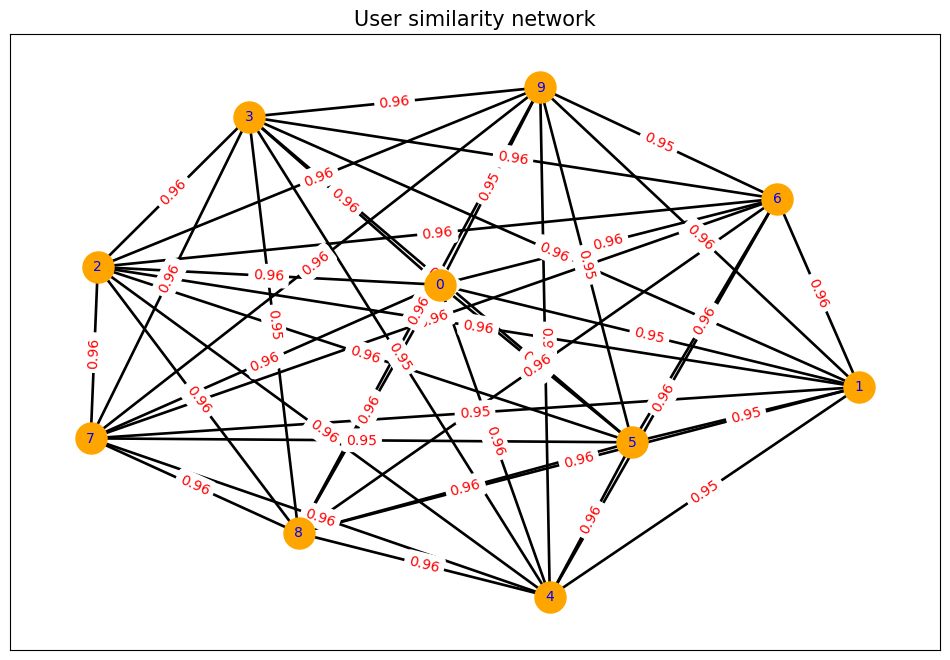

In [200]:
# plot the user-user similarity score

similarity_matrix=cosine_similarity(user_genre_matrix)

# initialize graph
G=nx.Graph()
n_users=user_genre_matrix.shape[0]
G.add_nodes_from(range(n_users))
threshold=0.5

# add edges if they have similarity greater than threshold
for i in range(n_users):
    for j in range(i+1,n_users):
        similarity_score=similarity_matrix[i,j]
        if similarity_score>threshold:
            G.add_edge(i,j,weight=similarity_score)

plt.figure(figsize=(12,8))
# Plot node and edge with weights
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=500, node_color='orange')
edges=G.edges(data=True)
weight=[edge[2]['weight']*2 for edge in edges]
nx.draw_networkx_edges(G,pos,edgelist=G.edges(),width=weight)

# plot node label and edge label
nx.draw_networkx_labels(G,pos,font_size=10,font_color='blue')
edge_labels={(i,j): f'{G[i][j]["weight"]:.2f}' for i,j in G.edges()}
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.title('User similarity network', fontsize=15)
plt.show()

In [201]:
# develop collaborative filter function. given a input genre lists from new user, assume the user scores 100 to the genre, 
# then find the best genres based on similar users

def collaborative_filtering(user_genre_matrix,inout_genres,n_similar_users=5):
    # initialize user profile for the new user with 0 in each genre
    user_profile=pd.Series(0,index=user_genre_matrix.columns)

    # if the input genre is in the user-genre matrix, assume the new user scores 100 to the genre
    for genre in inout_genres:
        if genre in user_profile.index:
            user_profile[genre]=100

    # get the similarity of the new user with all training users
    similarity=cosine_similarity(user_profile.values.reshape(1,-1),user_genre_matrix)[0]
    similar_users=similarity.argsort()[::-1][:n_similar_users]
    
    # get the mean scores of each genre among the most similar users
    recommendations=user_genre_matrix.iloc[similar_users].mean()
    
    # return the genres with highest scores from similar users
    sort_recommendations=recommendations.sort_values(ascending=False)
    return sort_recommendations

In [202]:
# recommend the songs based on top recommended genres
def recommend_songs(recommendations,df,top_n=5):
    recommdend_songs=[]
    for genre in recommendations.index: # the top genres being recommended
        # recommend the song that has this genre, recommend from the top 'track_pop'
        songs=df[df['artist_genres'].apply(lambda x: genre in x).sort_values('track_pop',ascending=False)]
        if not songs.empty:
            recommdend_songs.append(songs.iloc[0])
        if len(recommdend_songs)>=top_n:
            break
    return pd.DataFrame(recommdend_songs)

In [203]:
def evaluate_model(user_genre_matrix,test_ratio=0.2):
    train_matrix, test_matrix=train_test_split(user_genre_matrix,test_size=test_ratio)

    mse_score=[]
    for user in test_matrix.index:
        # the input genre is the genres that the test user has listend to (with value >0)
        input_genres=test_matrix.columns[test_matrix.loc[user]>0].tolist()
        recommendations=collaborative_filtering(train_matrix,input_genres) # can pass the real scores from the test users
        true_ratings=test_matrix.loc[user]
        mse=mean_squared_error(true_ratings,recommendations[true_ratings.index])
        mse_score.append(mse)

        return np.mean(mse_score)

Mean Square Error: 198.19


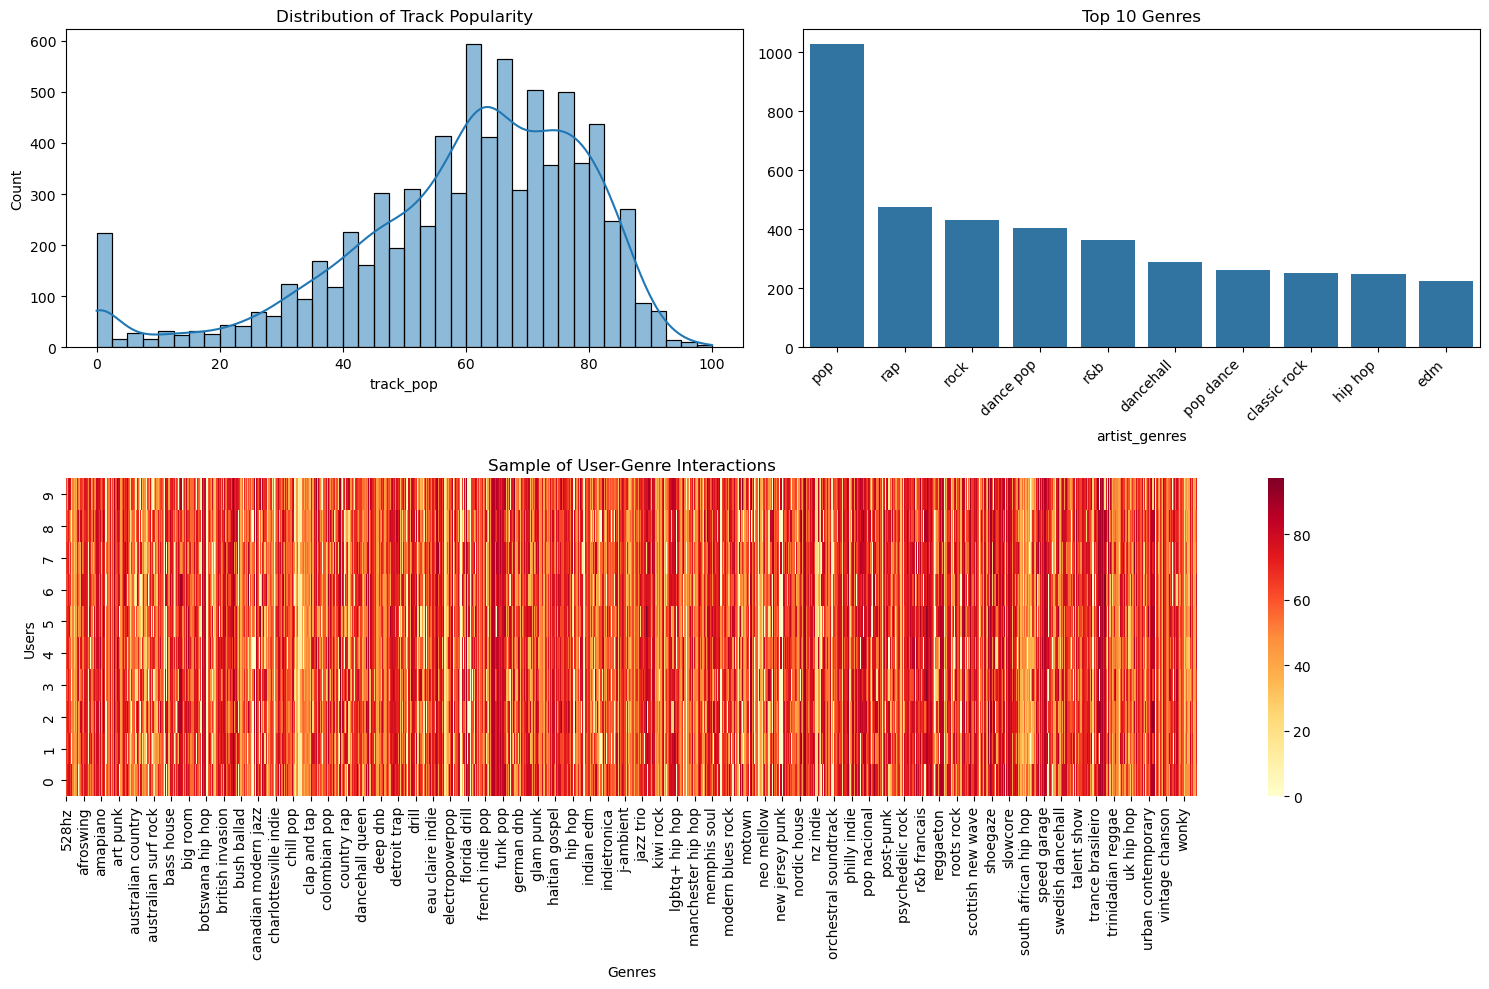

In [206]:
mse=evaluate_model(user_genre_matrix)
print(f'Mean Square Error: {mse:.2f}')

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['track_pop'],kde=True)
plt.title('Distribution of Track Popularity')

plt.subplot(2,2,2)
# .explode() can transform each element in a lisk-like to an independent row
genre_counts=df['artist_genres'].explode().value_counts()
sns.barplot(x=genre_counts.index[:10],y=genre_counts.values[:10])
plt.title('Top 10 Genres')
plt.xticks(rotation=45,ha='right')

plt.subplot(2,2,(3,4))
sns.heatmap(user_genre_matrix.sample(10).sort_index(ascending=False),cmap='YlOrRd')
plt.title('Sample of User-Genre Interactions')
plt.xlabel('Genres')
plt.ylabel('Users')

plt.tight_layout()
plt.show()

In [213]:
# Assume a new user listed to two genres (with score 100)
input_genres=['pop','indie r&b']
print(f'Input Genres: {input_genres}')

recommendation_engine=collaborative_filtering(user_genre_matrix,input_genres)
print("\n Top genre recommendations: ")
print(recommendation_engine.head())

Input Genres: ['pop', 'indie r&b']

 Top genre recommendations: 
genre
brooklyn indie     97.0
norwegian indie    91.0
shiver pop         90.0
float house        90.0
trap argentino     89.4
dtype: float64
